<a href="https://colab.research.google.com/github/janzaw04/myTestRep/blob/main/%C4%87wiczenia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.


# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)

print("Image shape: ",X_train.shape)
# dimension of face image


Image shape:  (35000, 784)


In [3]:
# tu musimy zdefiniować klasyfikator, wytrenowaći sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 

clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', learning_rate_init=0.001, early_stopping=True, alpha=0.1, solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000)
                 

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)



Iteration 1, loss = 0.64079898
Validation score: 0.924714
Iteration 2, loss = 0.29354104
Validation score: 0.944000
Iteration 3, loss = 0.23795204
Validation score: 0.953857
Iteration 4, loss = 0.20784978
Validation score: 0.953143
Iteration 5, loss = 0.18620283
Validation score: 0.962429
Iteration 6, loss = 0.16976050
Validation score: 0.961000
Iteration 7, loss = 0.15598608
Validation score: 0.962286
Iteration 8, loss = 0.14527609
Validation score: 0.966429
Iteration 9, loss = 0.13730107
Validation score: 0.965857
Iteration 10, loss = 0.13167884
Validation score: 0.968143
Iteration 11, loss = 0.12512442
Validation score: 0.968143
Iteration 12, loss = 0.11822900
Validation score: 0.969000
Iteration 13, loss = 0.11363596
Validation score: 0.970000
Iteration 14, loss = 0.10975917
Validation score: 0.973571
Iteration 15, loss = 0.10840347
Validation score: 0.970571
Iteration 16, loss = 0.10323517
Validation score: 0.970571
Iteration 17, loss = 0.10107471
Validation score: 0.971571
Iterat

[0.9247142857142857, 0.944, 0.9538571428571428, 0.9531428571428572, 0.9624285714285714, 0.961, 0.9622857142857143, 0.9664285714285714, 0.9658571428571429, 0.9681428571428572, 0.9681428571428572, 0.969, 0.97, 0.9735714285714285, 0.9705714285714285, 0.9705714285714285, 0.9715714285714285, 0.971, 0.9712857142857143, 0.9724285714285714, 0.9717142857142858, 0.971, 0.973, 0.9727142857142858, 0.9725714285714285]


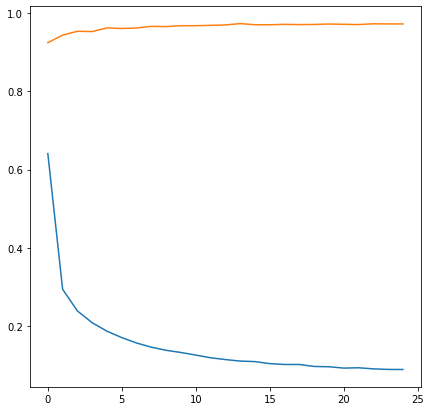

In [4]:
# tu rysujemy loss i validation score
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

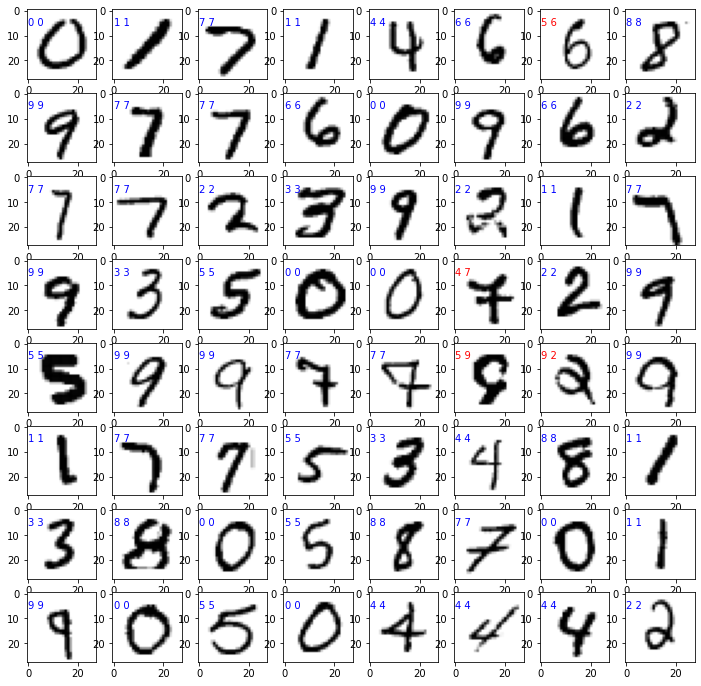

In [5]:
# Plot the prediction
fig = plt.figure(figsize=(12, 12)) #figure size in inches
predicted = clf.predict(X_test)

# Tu rysujemy cyfry z wynikami
#plot the digits: each image is 28x28 pixels
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1)
  ax.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
  if y_test[i] == predicted[i]:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='blue')
  else:
    ax.text(0,6,predicted[i] + ' ' + y_test[i], color='red')



In [6]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3409
           1       0.98      0.98      0.98      3949
           2       0.97      0.97      0.97      3500
           3       0.96      0.96      0.96      3557
           4       0.97      0.97      0.97      3398
           5       0.96      0.96      0.96      3203
           6       0.97      0.98      0.98      3444
           7       0.96      0.98      0.97      3637
           8       0.97      0.95      0.96      3437
           9       0.96      0.95      0.96      3466

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



In [7]:
print(metrics.confusion_matrix(y_test, predicted))

[[3355    0    2    5    0   12   20    4    8    3]
 [   1 3877   22   11    4    2    2   11   13    6]
 [  14   13 3390   17    9    1   11   28   14    3]
 [   3    5   16 3419    0   46    2   24   24   18]
 [   5    8   13    0 3286    2   18   17    8   41]
 [  19    6    4   35    5 3080   28    5   10   11]
 [  13    4    2    0   11   24 3382    2    6    0]
 [   4   11   22    8   17    1    0 3550    3   21]
 [  18   18   13   48    4   28   26    9 3253   20]
 [   8    7    2   26   39   19    2   40   19 3304]]


In [8]:

####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


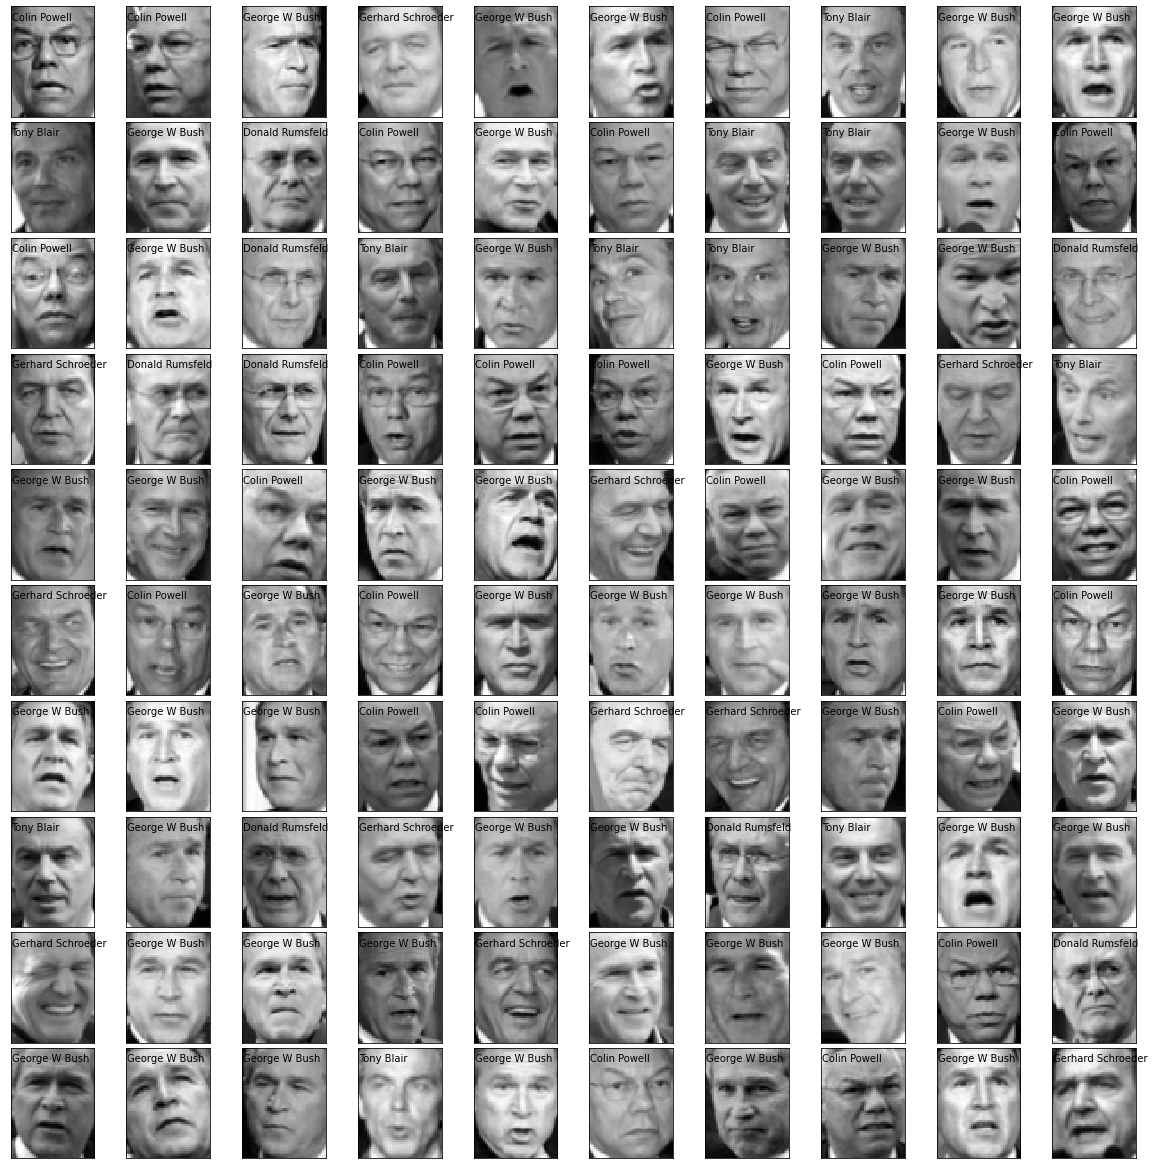

In [9]:
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(target_names[y_test[i]]))

In [10]:
# train the model
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', alpha=1, learning_rate_init=0.001, early_stopping=True, 
                    solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000, n_iter_no_change=90)
                 

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)



Iteration 1, loss = inf
Validation score: 0.192982
Iteration 2, loss = inf
Validation score: 0.526316
Iteration 3, loss = inf
Validation score: 0.204678
Iteration 4, loss = 84.13830289
Validation score: 0.532164
Iteration 5, loss = 70.65046496
Validation score: 0.216374
Iteration 6, loss = 55.01038292
Validation score: 0.122807
Iteration 7, loss = 43.41211984
Validation score: 0.526316
Iteration 8, loss = 42.61543076
Validation score: 0.520468
Iteration 9, loss = 40.45646826
Validation score: 0.485380
Iteration 10, loss = 20.18684182
Validation score: 0.526316
Iteration 11, loss = 18.37371201
Validation score: 0.502924
Iteration 12, loss = 12.88303308
Validation score: 0.520468
Iteration 13, loss = 18.81217223
Validation score: 0.216374
Iteration 14, loss = 12.86797455
Validation score: 0.561404
Iteration 15, loss = 9.62171979
Validation score: 0.456140
Iteration 16, loss = 9.13608732
Validation score: 0.233918
Iteration 17, loss = 19.39914915
Validation score: 0.485380
Iteration 18, l

[0.19298245614035087, 0.5263157894736842, 0.2046783625730994, 0.5321637426900585, 0.21637426900584794, 0.12280701754385964, 0.5263157894736842, 0.52046783625731, 0.4853801169590643, 0.5263157894736842, 0.5029239766081871, 0.52046783625731, 0.21637426900584794, 0.5614035087719298, 0.45614035087719296, 0.23391812865497075, 0.4853801169590643, 0.25146198830409355, 0.52046783625731, 0.17543859649122806, 0.49122807017543857, 0.21052631578947367, 0.3333333333333333, 0.2807017543859649, 0.543859649122807, 0.5789473684210527, 0.5497076023391813, 0.4444444444444444, 0.2573099415204678, 0.5263157894736842, 0.5087719298245614, 0.5497076023391813, 0.23976608187134502, 0.14035087719298245, 0.5146198830409356, 0.49122807017543857, 0.5730994152046783, 0.6081871345029239, 0.5847953216374269, 0.5906432748538012, 0.6549707602339181, 0.6374269005847953, 0.6432748538011696, 0.6257309941520468, 0.6374269005847953, 0.52046783625731, 0.5672514619883041, 0.6198830409356725, 0.6900584795321637, 0.6725146198830

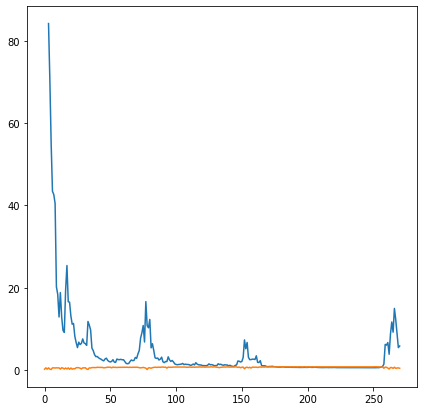

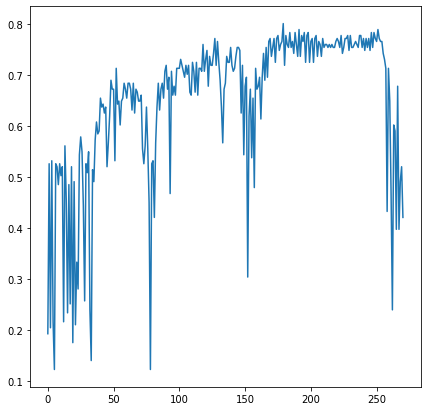

In [11]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

fig=plt.figure(figsize=(7,7))

#plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

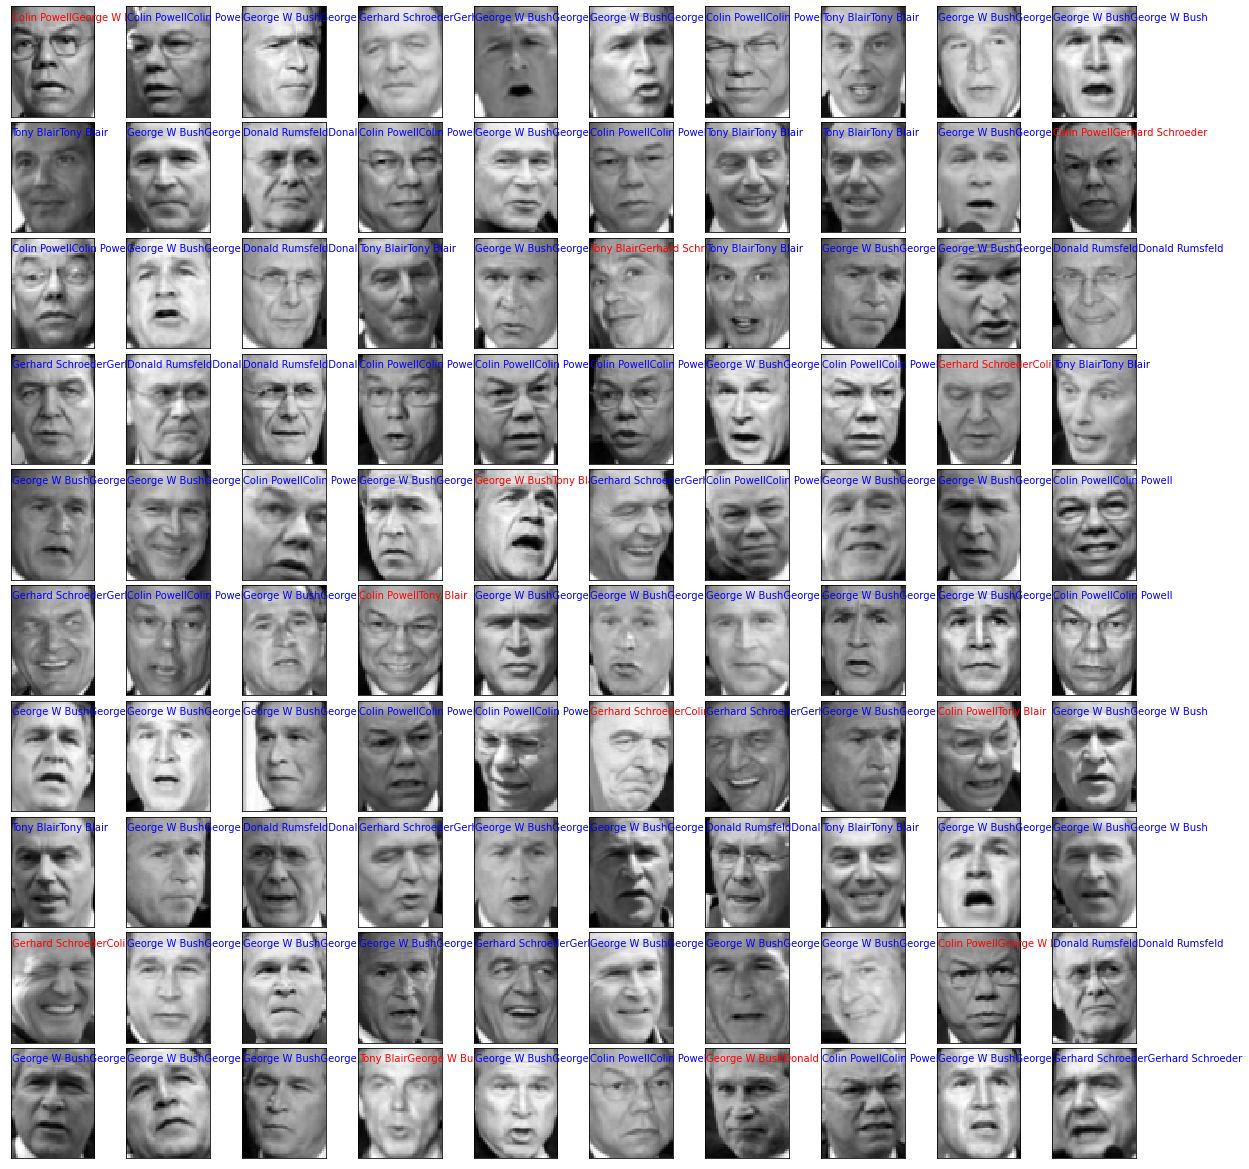

In [12]:
# Plot the prediction
predicted = clf.predict(X_test)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  if y_test[i] == predicted[i]:
    ax.text(0, 7, str(target_names[y_test[i]]) + str(target_names[predicted[i]]), color='blue')
  else:
    ax.text(0, 7, str(target_names[y_test[i]]) + str(target_names[predicted[i]]), color='red')
    

In [13]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        64
           1       0.90      0.59      0.72        32
           2       0.87      0.93      0.90       127
           3       0.69      0.62      0.65        29
           4       0.68      0.82      0.74        33

    accuracy                           0.83       285
   macro avg       0.80      0.76      0.77       285
weighted avg       0.83      0.83      0.83       285



In [14]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 54   0   5   1   4]
 [  4  19   5   1   3]
 [  0   2 118   4   3]
 [  5   0   3  18   3]
 [  0   0   4   2  27]]
